In [1]:
import numpy as np
import homography as h
import filter as f
from PIL import Image
import matplotlib.pyplot as plt
import main as m
from numba import jit

from homography import MergeByDistance

In [ ]:
@jit(nopython=True)
def White(I):
    x, y = I.shape
    for i in range(x):
        for j in range(y):
            if I[i, j] > 100:
                I[i, j] = 255
            else:
                I[i, j] = 0
    return I

In [ ]:
I = np.array(Image.open("images/Feuille3.jpg", mode="r").convert('L'))

In [ ]:
MX, MY = m.Canny(m.Compresser(m.GaussianBlur(I, 10, 1), 5))
MX = m.GaussianBlur(MX, 10, 5)
MY = m.GaussianBlur(MY, 10, 5)
P = m.Seuil(m.Produit(abs(MX), abs(MY)), np.max(m.Produit(abs(MX), abs(MY)))*.09)
T = h.FindCornersPosition(P)
X, Y = zip(*T)

plt.scatter(Y, X, color="blue")

h.MergeByDistance(T, 250)
X, Y = zip(*T)

P1 = h.HarrisCorner(P, .1)
X1, Y1 = zip(*P1)

plt.scatter(Y, X, color="red")
#plt.scatter(Y1, X1, color="blue")
plt.imshow(P)
plt.show()

[[ 217.14904785 2634.28710938]
 [2452.6663208  2839.33349609]
 [ 742.14294434  194.28573608]
 [2356.35078788  248.72983813]]
[[   0.         1907.74657148]
 [1309.53641509 1907.74657148]
 [   0.            0.        ]
 [1309.53641509    0.        ]]


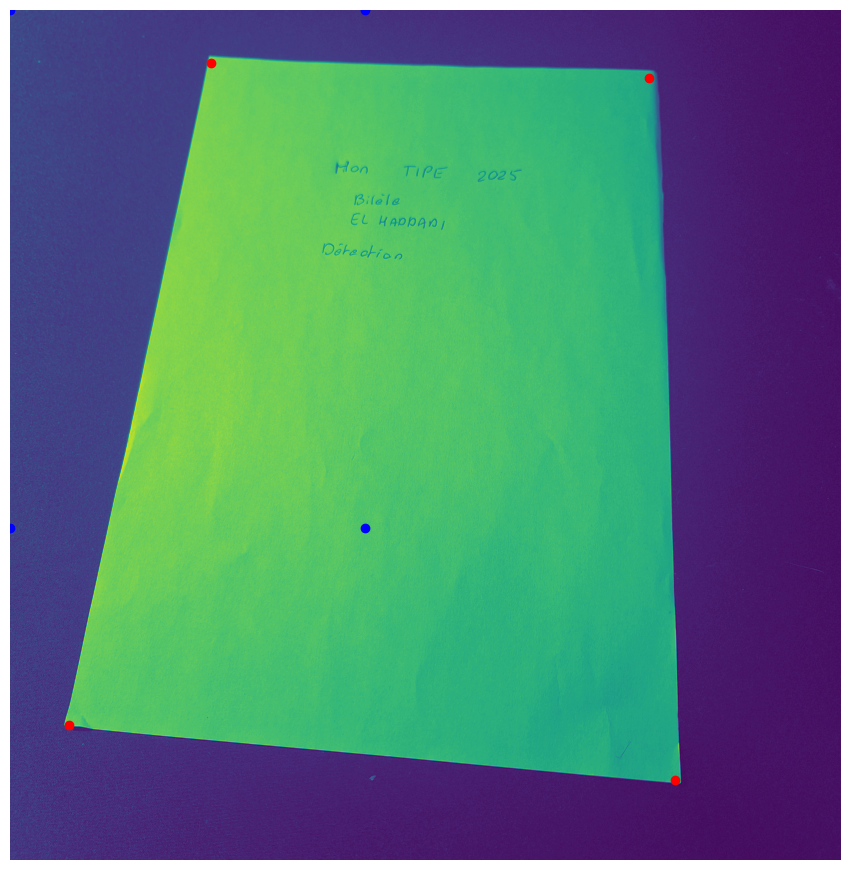

In [2]:
I = np.array(Image.open("images/Feuille3.jpg", mode="r").convert('L'))
H = h.MakeHomographie(I)

In [3]:
SI = f.FADIT(h.FillBasedOnNeighbour(H), (5,5)).transpose()

Seuil : 143


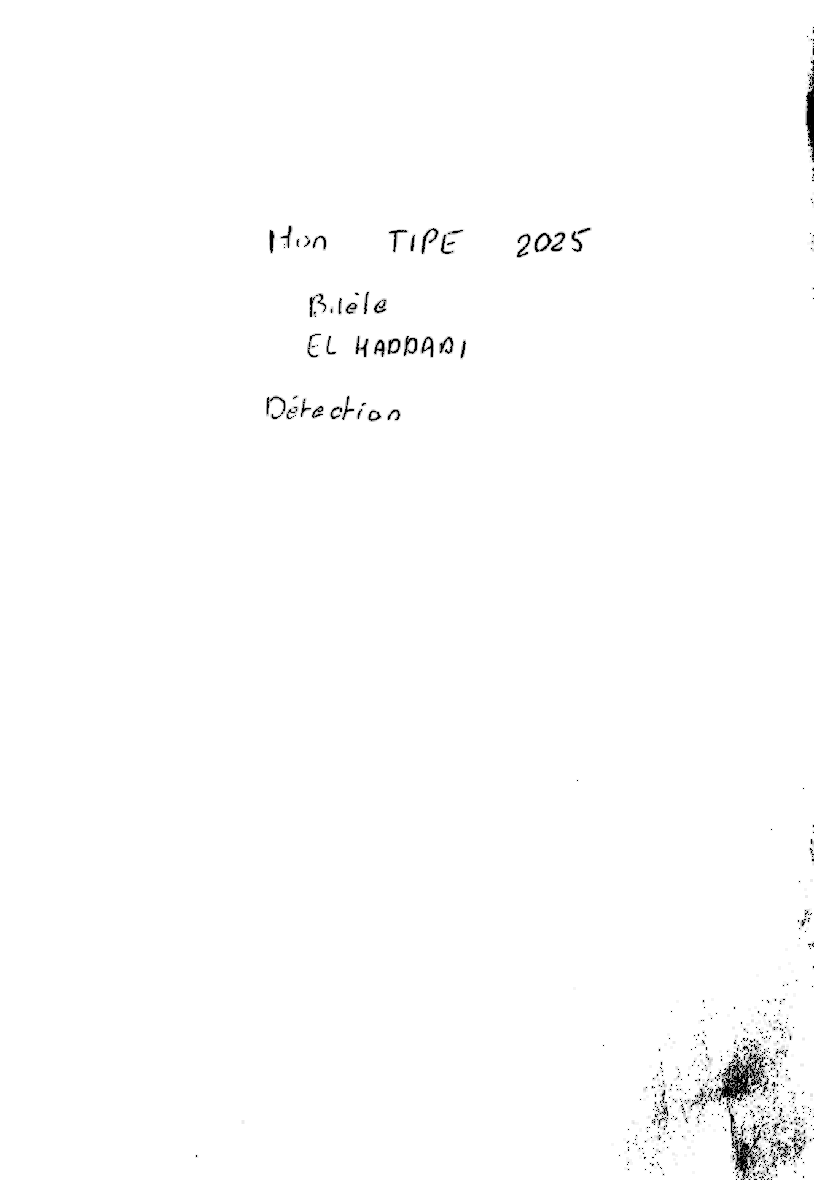

In [4]:

m.Afficher(f.MedianBlur(SI, 2))

In [ ]:
m.Afficher(f.NiblackParam(H, -.5, 4))

In [ ]:
m.Afficher(IH.transpose())

In [ ]:
MaxBright =

.

In [ ]:
L = [(45.86669921875, 183.532958984375), (650, 52), (653.5, 51.0), (659.93359375, 52.263671875), (712.34375, 616.84375)]
h.MergeByDistance(L, 5)
print(L)

In [ ]:
m.AfficherAxe(H)

In [ ]:
import numpy as np
import homography as h
from PIL import Image

import main as m

In [ ]:
I = np.array([[0,0,0,0,0,0],
              [0,1,1,0,0,0],
              [0,1,1,0,0,0],
              [0,0,0,0,1,0],
              [0,0,0,1,1,0],
              [0,0,0,0,0,0]])

In [ ]:
C = h.BarycentreClasses(h.ConnectedComponentLabeling(I))

In [ ]:
for p in C:
    I[int(p[0]), int(p[1])] = 255

In [ ]:
print(I)